# Fibonacci Sequence 
### The advantages, drawbacks, and potential improvements of  recursive algorithm.

[Leonardo Fibonacci](https://en.wikipedia.org/wiki/Fibonacci), or Leonardo da Pisa, or Leonardo Pisano, was an Italian mathematician. He is best known for his [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_sequence).

Fibonacci is not his surname or first name. His surname is unknown. However, his first name, Leonardo, was so common that later historian Guillaume Libri referred to him as 'Filius Bonacci' to avoid confusion, which was shortened to 'Fibonacci' and is now used as his name today. It can be considered a kind of patronymic.

Even excluding the famous Fibonacci sequence, he greatly influenced European mathematics because he introduced Arabic numerals to Europe in earnest. He followed his father, a merchant, to the Arab world often and studied in Bejaia, a port city in Algeria under the rule of the Muwahid dynasty. At that time, he felt that Arabic numerals were much more convenient than the European numeral system, so he introduced Arabic numerals in 'The Abacus (Liber Abaci)' in 1202. This book was intended for merchants, not scholars, so the examples were about commerce, such as buying and selling, currency exchange, and transactions. Of course, as we know, the Arabic numerals he introduced to the West spread widely beyond commerce to the world's academics and the general public. It can be said to be an achievement more significant than the Fibonacci sequence named after him.

This notebook explores the Fibonacci sequence from an algorithmic perspective, comparing recursive, iterative, and dynamic programming approaches while analyzing their time complexity.


[source1](https://www.linkedin.com/pulse/dynamic-programming-algorithms-python-fibonacci-sequence-raval-o2ezf/)

[source2](https://www.studysmarter.co.uk/explanations/computer-science/algorithms-in-computer-science/fibonacci-algorithm/#:~:text=In%20finite%20terms%2C%20the%20time,)%20and%20F(1).)


In [16]:
from matplotlib import pyplot as plt
import timeit
from functools import partial, lru_cache

### What is the Fibonacci Sequence?
The Fibonacci sequence is a series of numbers in which each number is the sum of the two preceding ones. 
It starts with 0 and 1, and the sequence continues indefinitely. The sequence begins as follows: $$ 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, ....$$

One way to calculate the Fibonacci sequence is to use a recursive function. In Python, we can define a recursive function to calculate the $n$th Fibonacci number as follows:.)



In [2]:
# Recursive Fibonacci
def rfib(n):
    if n < 2:
        return n
    else:
        return rfib(n-1) + rfib(n-2)

In [8]:
# Might be very slow or frozen if n>40 on a notebook (16GB, Intel i7, 1.80 GHz)
rfib(40)

102334155

Although this recursive solution works, it is not efficient. Although recursive algorithms are fundamental in computer science and admired for their elegant simplicity, they often lead to significant computational overhead.
The time complexity of the recursive Fibonacci algorithm is $\mathcal{O}(2^n)$,  making it exponentially slow.It means it becomes very slow for large values of $n$.   Here's an insight into why: To calculate$ F(4$), you first calculate$ F(3$) and$ F(2$). To compute$ F(3$), you again calculate$ F(2$) and$ F(1$). Notice the redundanc: $ F(2$) is calculated twice. Such duplicated effort multiplies a $n$  grows, leading to this staggering time complexityions.

Let's visualize this.

In [17]:
def plotTC(fn, nMin, nMax, nInc, nTests):
    """
    Run timer and plot time complexity
    """
    x = []
    y = []
    for i in range(nMin, nMax, nInc):
        N = i
        testNTimer = timeit.Timer(partial(fn, N))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    p1 = plt.plot(x, y, 'o')
    #pyplot.legend([p1,], [fn.__name__, ])

Analyzing Algorithms...


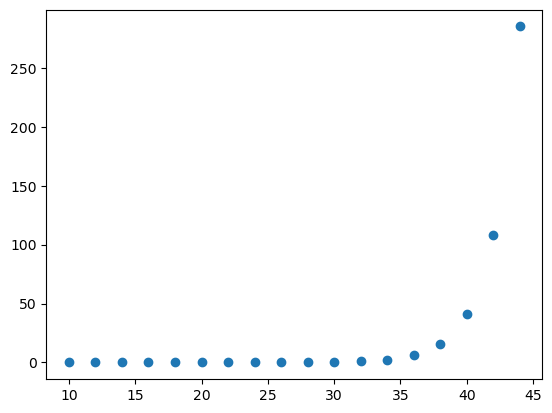

In [22]:
print('Analyzing Algorithms...')

plotTC(rfib, 10, 45, 2, 2) #Don't make nMax > 45

plt.show()

### Dynamic Programming Solution

To overcome the inefficiency of the recursive solution, we can use dynamic programming to store the previously calculated Fibonacci numbers and reuse them when needed. 

This approach, known as memoization, significantly improves the performance of the algorithm.

In [23]:
def fib_memo(n):
    fib = [1, 1]
    for i in range(2, n+1):r
        fib.append(fib[i-1] + fib[i-2])
    return fib[n]

In this dynamic programming solution, we initialize a list called fib with the first two Fibonacci numbers. 
Then, we iterate from 2 to n and calculate each Fibonacci number by adding the two preceding numbers in the list. Finally, we return the nth Fibonacci number.

In [30]:
ans = rfib_memo(100)
print("The nth Fibonacci number is:", ans)

The nth Fibonacci number is: 354224848179261915075


### Time Complexity Analysis

The dynamic programming solution has a time complexity of$\mathcal{O}(n)$
 because we only need to calculate each Fibonacci number once and store it in the list.

This is a significant improvement over the exponential time complexity of the recursive solution.

Analyzing Algorithms...


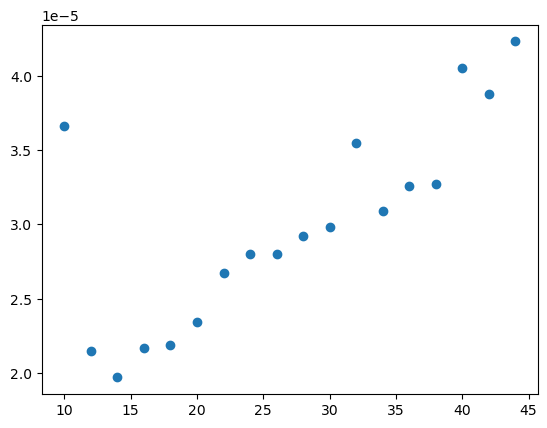

In [34]:
print('Analyzing Algorithms...')

plotTC(rfib_memo, 10, 45, 2, 2) 

plt.show()

We may write the code using a python library for dynamics programming also.

In [52]:
# Recursive Fibonacci with memoization
def rfib_memo2(n):
    @lru_cache(None)
    def fib(n):
        if n < 2:
            return n
        return fib(n - 1) + fib(n - 2)
    return fib(n)

In [53]:
ans2 = rfib_memo2(100)
print("The nth Fibonacci number is:", ans2)

The nth Fibonacci number is: 354224848179261915075


Analyzing Algorithms...


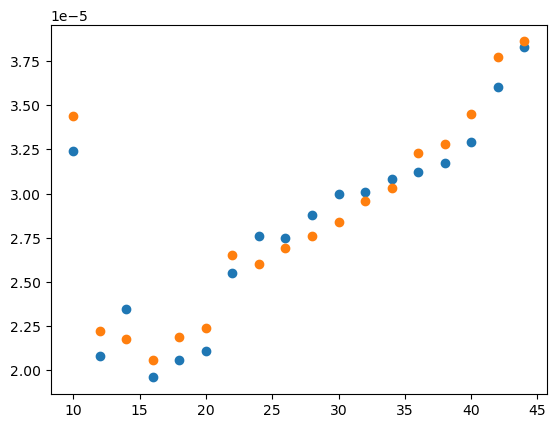

In [43]:
print('Analyzing Algorithms...')

plotTC(rfib_memo, 10, 45, 2, 2) 
plotTC(rfib_memo2, 10, 45, 2, 2) 

plt.show()

In [46]:
# Iterative Fibonacci
def fib_iterative(n):
    a, b = 0, 1
    for i in range(0, n):
   # Iterative Fibonacci     a, b = b, a + b
    return a

In [47]:
fib_iterative(6)

8

Analyzing Algorithms...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


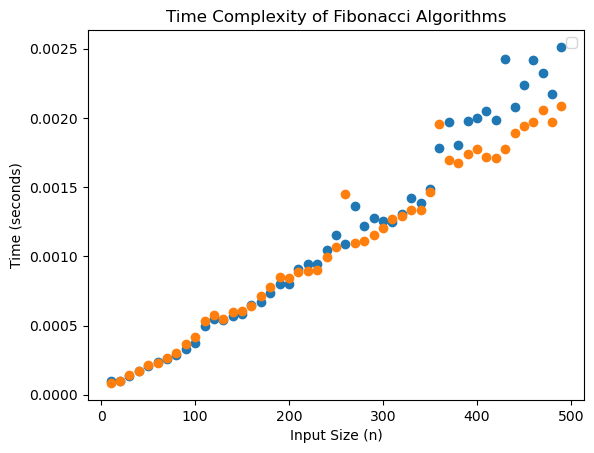

In [56]:
# main() function
def main():
    print('Analyzing Algorithms...')

    plotTC(rfib_memo, 10, 500, 10, 10)
    plotTC(rfib_memo2, 10, 500, 10, 10)
    #pyplot.ylim((-0.1, 0.5))

    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Time Complexity of Fibonacci Algorithms')
    
    # show plot
    plt.legend()
    plt.show()

# call main
#if __name__ == '__main__':
main()

Analyzing Algorithms...


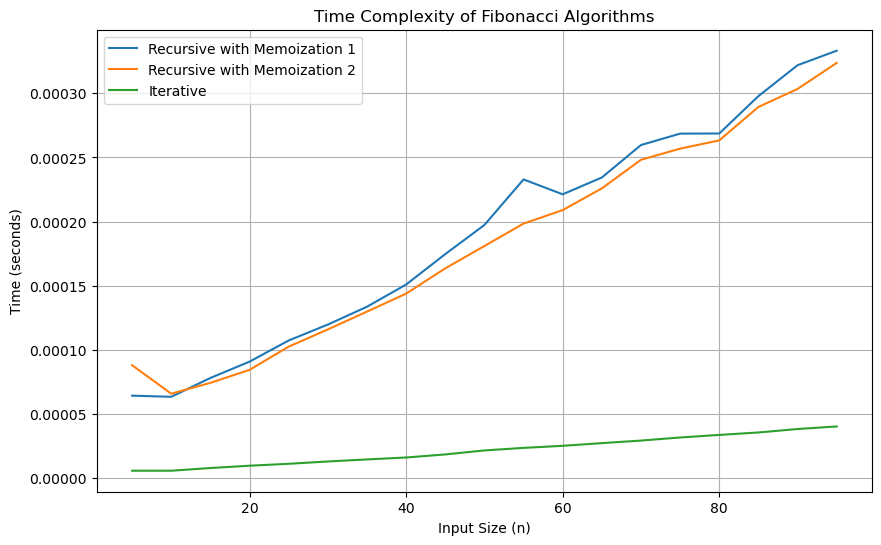

In [57]:
# Plotting time complexity
def plot_time_complexity(functions, labels, n_min, n_max, n_inc, n_tests):
    plt.figure(figsize=(10, 6))
    for fn, label in zip(functions, labels):
        x = []
        y = []
        for i in range(n_min, n_max, n_inc):
            timer = timeit.Timer(partial(fn, i))
            t = timer.timeit(number=n_tests)
            x.append(i)
            y.append(t)
        plt.plot(x, y, label=label)
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Time Complexity of Fibonacci Algorithms')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    print('Analyzing Algorithms...')
    
 #   functions = [rfib, rfib_memo, fib_iterative, fib_dynamic]
 #   labels = ['Recursive', 'Recursive with Memoization', 'Iterative', 'Dynamic Programming']

    functions = [rfib_memo, rfib_memo2, fib_iterative]
    labels = ['Recursive with Memoization 1', 'Recursive with Memoization 2',
                                               'Iterative']
    
    plot_time_complexity(functions, labels, n_min=5, n_max=100, n_inc=5, n_tests=10)

# Call main
if __name__ == '__main__':
    main()


Analyzing Algorithms...


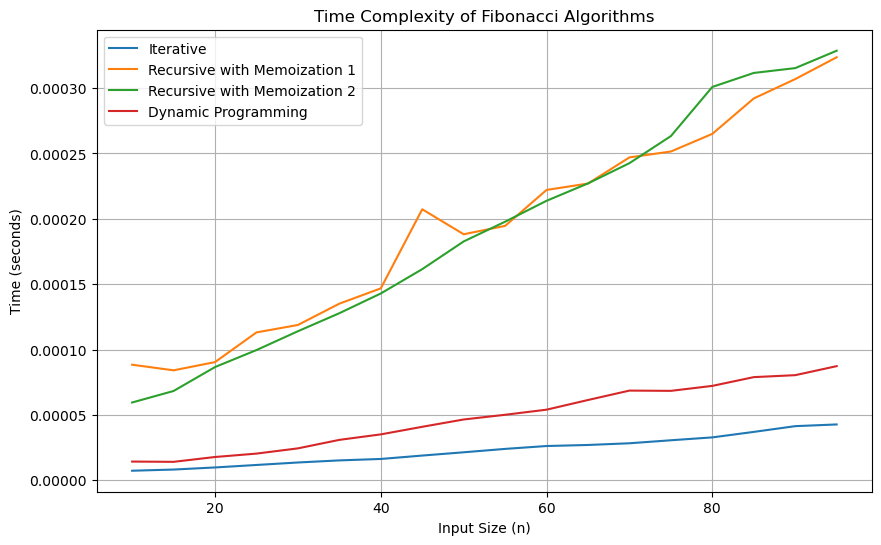

In [60]:

# Dynamic Programming Fibonacci
def fib_dynamic(n):
    if n < 2:
        return n
    dp = [0] * (n + 1)
    dp[1] = 1
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp[n]

# Plotting time complexity
def plot_time_complexity(functions, labels, n_min, n_max, n_inc, n_tests):
    plt.figure(figsize=(10, 6))
    for fn, label in zip(functions, labels):
        x = []
        y = []
        for i in range(n_min, n_max, n_inc):
            timer = timeit.Timer(partial(fn, i))
            t = timer.timeit(number=n_tests)
            x.append(i)
            y.append(t)
        plt.plot(x, y, label=label)
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Time Complexity of Fibonacci Algorithms')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    print('Analyzing Algorithms...')
    
 #   functions = [rfib, rfib_memo, fib_iterative, fib_dynamic]
 #   labels = ['Recursive', 'Recursive with Memoization', 'Iterative', 'Dynamic Programming']

    functions = [fib_iterative, rfib_memo,  rfib_memo, fib_dynamic]
    labels = ['Iterative', 'Recursive with Memoization 1', 'Recursive with Memoization 2',
                'Dynamic Programming']
    
    plot_time_complexity(functions, labels, n_min=10, n_max=100, n_inc=5, n_tests=10)

# Call main
if __name__ == '__main__':
    main()
